In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("C:/Users/HP\Downloads/Compressed/archive_8/Amazon Sale Report.csv")

C:\Users\HP\AppData\Local\Temp\ipykernel_18500\4185292499.py:5: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("C:/Users/HP\Downloads/Compressed/archive_8/Amazon Sale Report.csv")


In [22]:
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


In [23]:
df.fillna(0, inplace=True)

In [24]:
df.isnull().sum()

index                 0
Order ID              0
Date                  0
Status                0
Fulfilment            0
Sales Channel         0
ship-service-level    0
Style                 0
SKU                   0
Category              0
Size                  0
ASIN                  0
Courier Status        0
Qty                   0
currency              0
Amount                0
ship-city             0
ship-state            0
ship-postal-code      0
ship-country          0
promotion-ids         0
B2B                   0
fulfilled-by          0
Unnamed: 22           0
dtype: int64

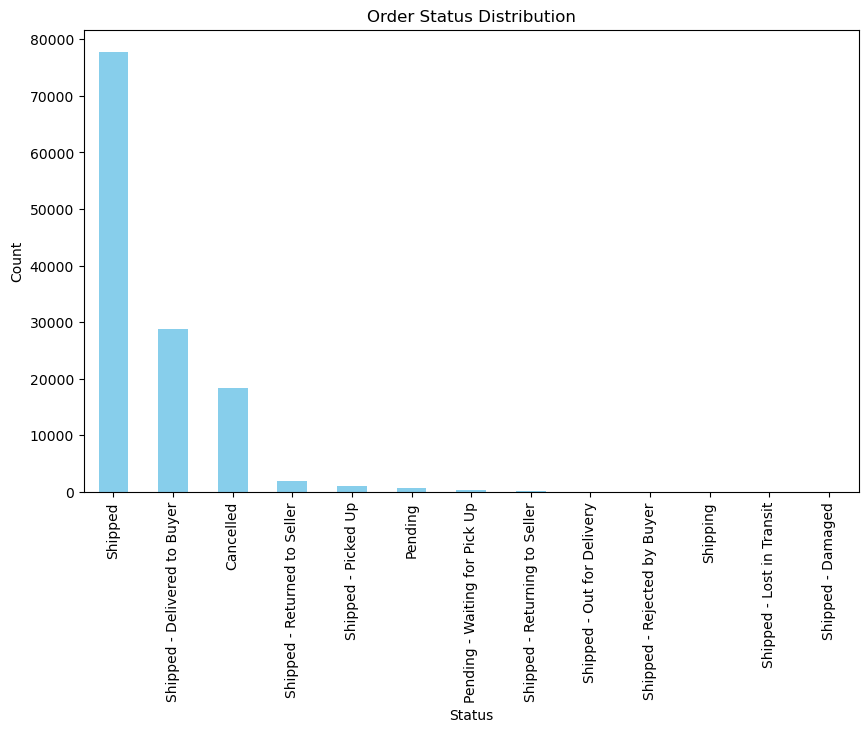

In [25]:
status_counts = df['Status'].value_counts()

# Plot the bar chart
plt.figure(figsize=(10, 6))
status_counts.plot(kind='bar', color='skyblue')
plt.title('Order Status Distribution')
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()

In [26]:
# Read a Jason file in Pandas 
# windows funcition in pandas and pivot

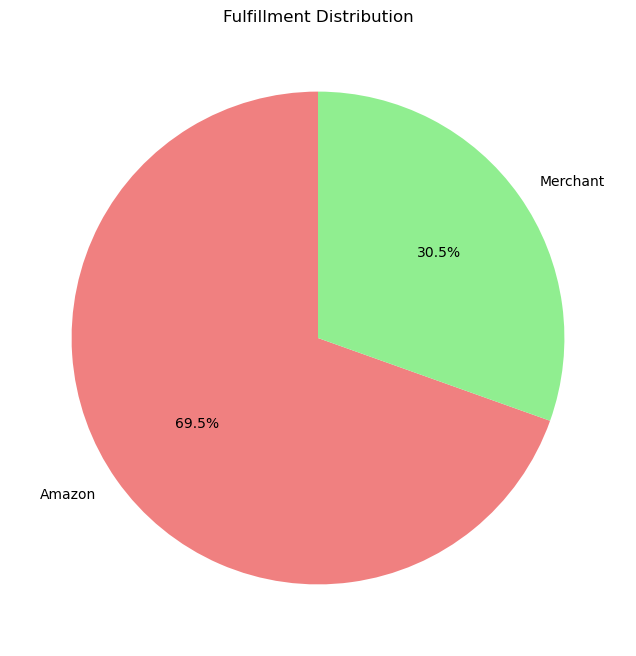

In [27]:
fulfillment_counts = df['Fulfilment'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(fulfillment_counts, labels=fulfillment_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightgreen'])
plt.title('Fulfillment Distribution')
plt.show()


In [28]:
fulfillment_counts

Amazon      89698
Merchant    39277
Name: Fulfilment, dtype: int64

<Figure size 1000x600 with 0 Axes>

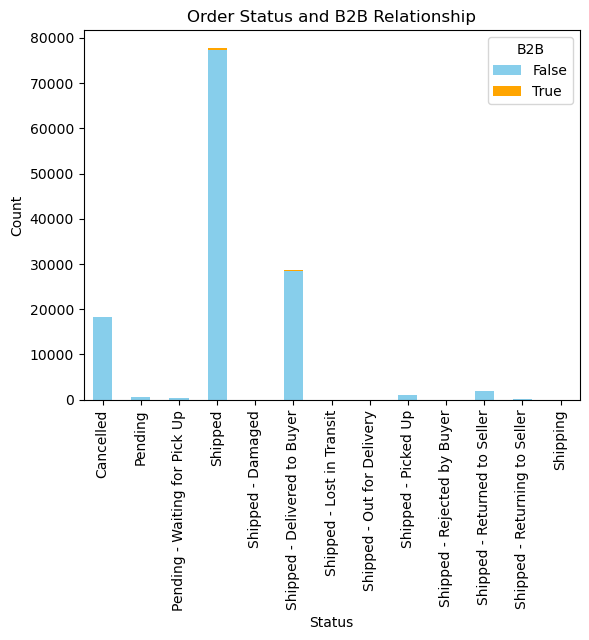

In [29]:
status_b2b_counts = df.groupby(['Status', 'B2B']).size().unstack()

plt.figure(figsize=(10, 6))
status_b2b_counts.plot(kind='bar', stacked=True, color=['skyblue', 'orange'])
plt.title('Order Status and B2B Relationship')
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()


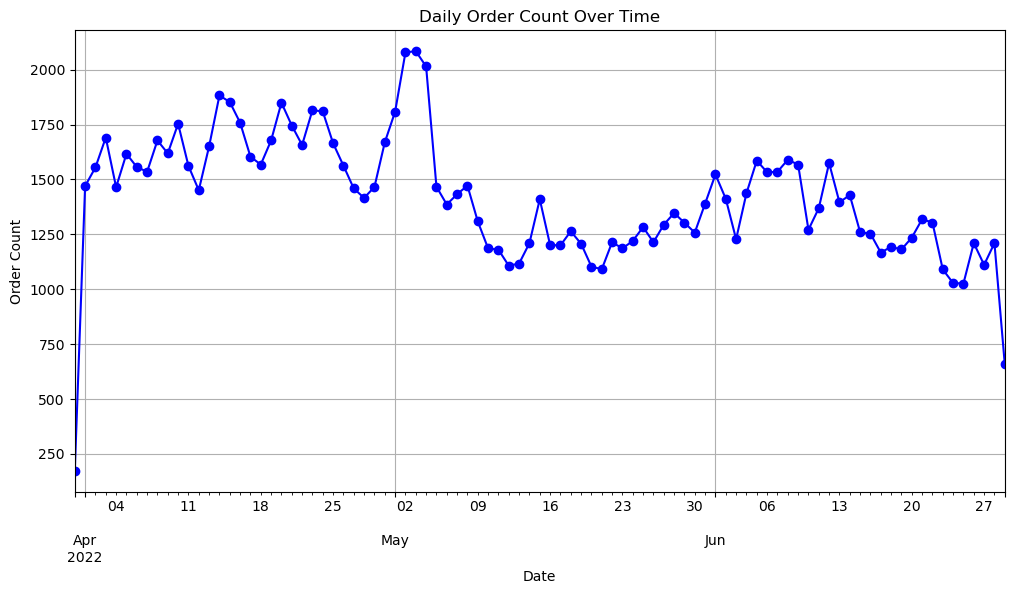

In [30]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df is your DataFrame
df['Date'] = pd.to_datetime(df['Date'])  # Convert 'Date' column to datetime format
df.set_index('Date', inplace=True)  # Set 'Date' as the index for time series analysis

# Resample data by day and count orders
daily_order_count = df.resample('D').size()

plt.figure(figsize=(12, 6))
daily_order_count.plot(marker='o', linestyle='-', color='b')
plt.title('Daily Order Count Over Time')
plt.xlabel('Date')
plt.ylabel('Order Count')
plt.grid(True)
plt.show()
